# Testing Zero-Inflated Count Matrix Factorization in Buettner data 

In [21]:
from pCMF.misc import utils, plot_utils, print_utils
from pCMF.misc.model_wrapper import ModelWrapper
from pCMF.models.pcmf import pcmf

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

import pandas as pd
from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline

In [22]:
expression_path = '../data/Buettner/expression.csv'
labels_path = '../data/Buettner/labels.csv'

In [23]:
X_log, y = pd.read_csv(expression_path), pd.read_csv(labels_path)

In [24]:
X_log.shape

(8989, 183)

In [25]:
X_log.head()

,Unnamed: 0,1,2,3,4,5,6,7,8,9,...,173,174,175,176,177,178,179,180,181,182
0,1,1.7363,0.73528,2.1394,1.50450,2.80570,2.5329,2.71240,0.23202,3.02960,...,2.9572,3.3816,1.52370,2.7699,3.41440,2.33600,2.37460,3.2444,0.54045,0.0000
1,2,2.5923,0.99441,1.7607,1.66730,0.73876,2.9683,2.74050,2.69670,2.73080,...,2.8194,2.8160,2.82040,2.9004,2.84250,2.62380,0.00000,2.9396,2.69260,0.0000
2,3,0.0000,0.00000,0.0000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,...,0.0000,0.0000,0.00000,0.0000,0.00000,0.00000,0.00000,0.0000,0.00000,0.0000
3,4,0.0000,0.00000,2.7896,0.46165,0.00000,0.0000,1.37060,0.23202,0.39723,...,2.6859,2.8768,0.35140,1.8513,2.98300,0.89488,2.02000,2.3495,0.00000,0.0000
4,5,1.1269,0.00000,1.2235,0.61892,0.60059,1.2013,0.38103,0.00000,0.84408,...,2.1448,1.3591,0.98774,2.0100,0.96259,0.00000,0.96068,0.0000,2.53400,2.9595


In [26]:
X_log = X_log.drop(X_log.columns[0], axis=1)

In [27]:
X_log.shape

(8989, 182)

In [28]:
X_log = np.array(X_log.T)

In [29]:
y = y.drop(y.columns[0], axis=1)

In [30]:
y = np.array(y).ravel()

## Look at the normalized log-counts distribution

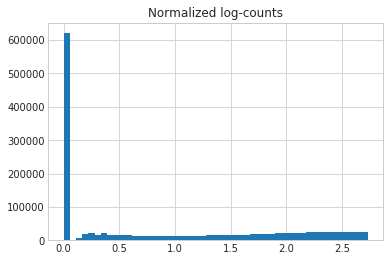

In [58]:
sortedex = np.sort(X_log.flatten())[:int(0.9*X_log.size)]

bins = np.linspace(0, sortedex.max(), num=50)

plt.hist(sortedex, bins)
plt.title('Normalized log-counts')
plt.show()

In [48]:
X = np.exp(X_log) - 1

In [49]:
X = np.round(X)

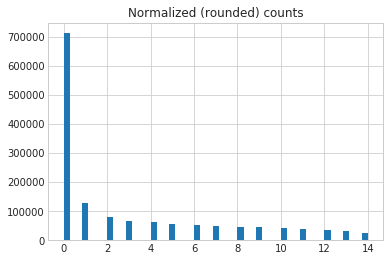

In [57]:
sortedex = np.sort(X.flatten())[:int(0.9*X.size)]

bins = np.linspace(0, sortedex.max(), num=50)

plt.hist(sortedex, bins)
plt.title('Normalized (rounded) counts')
plt.show()

In [59]:
# Run PCA
print('Running PCA...')
obj = PCA(n_components=10)
pca = ModelWrapper(X_log, y, name='PCA')
pca.run(obj.fit_transform)
print('Done.\n')

Running PCA...
Done.



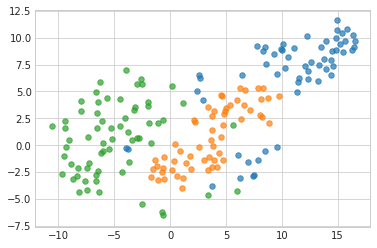

In [61]:
plot_utils.plot_tsne(pca.proj_2d, pca.c_train)

In [79]:
T = 60 * 20
S = 1
max_iter = 1000

In [80]:
print('Running PCMF...')
cavi = pcmf.PCMF(X, y)
cavi.run(max_iter=max_iter, max_time=T, sampling_rate=S, do_imp=False, do_holl=False, do_dll=False, verbose=True)
print('Done.\n')

Running PCMF...
CAVI-EB:
Considering zero-inflated counts.
Considering loading sparsity.
Running CAVI-EB...
Iteration 13/1000. Log-likelihood: -57.831. Elapsed: 0h20m23s
Done.



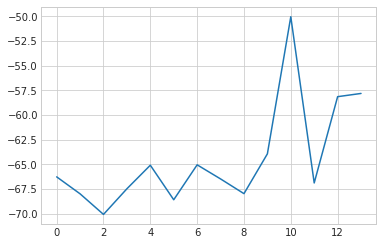

In [81]:
plot_utils.plot_model_convergence([cavi], 'll_it')

In [82]:
print_utils.print_model_silhouettes([cavi, pca])

Silhouette scores:
- PCA: 0.158295
- CAVI-EB: -0.158704


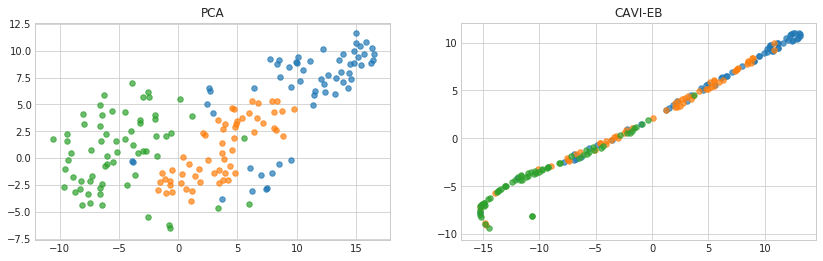

In [83]:
fig = plt.figure(figsize=(14, 4))
ax = plt.axes()
plot_utils.plot_sorted_tsnes([pca, cavi], y, ax=ax)
plt.show()